# Generate new data sample by running the following code on your computer

In [ ]:
import pandas as pd
from dataset_generator import dataset_generator
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#WARNING : take time to run, fit all the models to update the dataset
data = dataset_generator()

# Train the model to predict the energy consumption given the common dataset

In [ ]:
from train_model import train_models
from data_processing import full_dataset_pipeline, convert_filepaths_to_df
from os.path import join

In [ ]:
files = [
    [join("data", "sub_dataset_energy07-57-54_nico.csv"), join("data","Model_features08-12-18_nico.csv")],
    [join("data", "sub_dataset_energy07-40-32_guillaume.csv"), join("data", "Model_features08-15-31_guillaume.csv")],
    [join("data", "sub_dataset_energy07-26-12_emma.csv"), join("data", "Model_features08-15-31_guillaume.csv")],
    [join("data", "sub_dataset_energy08-43-15_nico2.csv"), join("data", "Model_features09-17-12_nico2.csv")]
]

files = convert_filepaths_to_df(files)
dataset = full_dataset_pipeline(files)
dataset.drop(inplace=True, columns="Unnamed: 0")
dataset

In [ ]:
train_models(dataset)

# Predict the energy consumption of your model fit

In [14]:
from predictions import energy
from sklearn.linear_model import Ridge
import numpy as np
np.random.seed(42)

#sample_size = np.around(np.logspace(0,3)).astype(int)
sample_size = [50]
X = []
y = []
for i in sample_size :  
    X.append(np.random.randn(i,50))
    y.append(np.random.randn(i))

predict = []
for X_,y_ in zip(X,y) :
    predict.append(np.exp(energy(Ridge, X_))[0])

In [15]:
from codecarbon import EmissionsTracker

real = []
for X_,y_ in zip(X,y) :  
    tracker = EmissionsTracker(log_level = 'error')
    tracker.start()
    Ridge().fit(X_, y_)
    real.append(tracker.stop())

In [16]:
from sklearn.metrics import mean_squared_error
print('predict :', predict)
print('real :', real)

mean_squared_error([predict], [real])

predict : [1.1243367235443284e-07]
real : [1.0622624991826696e-08]


1.0365489365070831e-14

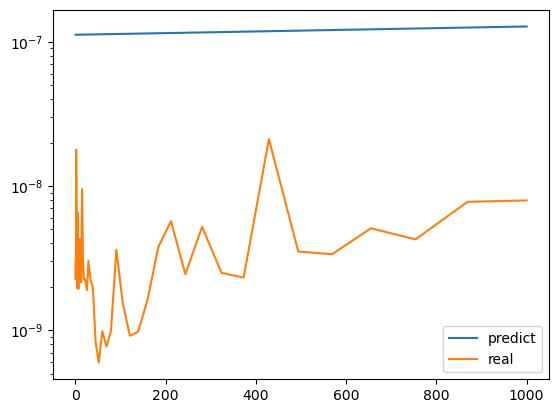

In [7]:
import matplotlib.pyplot as plt
plt.yscale('log')
plt.plot(sample_size, predict, label = 'predict')
plt.plot(sample_size, real, label = 'real')
plt.legend()
plt.show()